In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [22]:
df = pd.read_csv('Students_Performance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
df4 = df.copy()

In [24]:
df4.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [25]:
df4['english score'] = df4['reading score'] + df4['writing score']
df4.drop(['reading score'],inplace=True,axis=1)
df4.drop(['writing score'],inplace=True,axis=1)
df4.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,english score
0,female,group B,bachelor's degree,standard,none,72,146
1,female,group C,some college,standard,completed,69,178
2,female,group B,master's degree,standard,none,90,188
3,male,group A,associate's degree,free/reduced,none,47,101
4,male,group C,some college,standard,none,76,153


In [26]:
def transform_recommend(math_score, english_score):
    if math_score <= 70 and english_score <= 140:
        study = "Both"
        return study
    elif math_score <= 70 and english_score >= 140:
        study = "Algebra"
        return study
    elif math_score >= 70 and english_score <= 140:
        study = "Comprehension"
        return study
    else:
        study = "No recommendation"
        return study

df4['Recommendation'] = df4.apply(lambda row: transform_recommend(row['math score'], row['english score']), axis=1)
df4.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,english score,Recommendation
0,female,group B,bachelor's degree,standard,none,72,146,No recommendation
1,female,group C,some college,standard,completed,69,178,Algebra
2,female,group B,master's degree,standard,none,90,188,No recommendation
3,male,group A,associate's degree,free/reduced,none,47,101,Both
4,male,group C,some college,standard,none,76,153,No recommendation


In [27]:
df4.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,english score,Recommendation
0,female,group B,bachelor's degree,standard,none,72,146,No recommendation
1,female,group C,some college,standard,completed,69,178,Algebra
2,female,group B,master's degree,standard,none,90,188,No recommendation
3,male,group A,associate's degree,free/reduced,none,47,101,Both
4,male,group C,some college,standard,none,76,153,No recommendation


In [28]:
recom1 = df4['Recommendation'].unique()

In [29]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df4['gender']= label_encoder.fit_transform(df4['gender'])
df4['race/ethnicity']= label_encoder.fit_transform(df4['race/ethnicity'])
df4['parental level of education']= label_encoder.fit_transform(df4['parental level of education'])
df4['lunch']= label_encoder.fit_transform(df4['lunch'])
df4['test preparation course']= label_encoder.fit_transform(df4['test preparation course'])
df4['Recommendation']= label_encoder.fit_transform(df4['Recommendation'])

C:\AshishPython\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\AshishPython\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\AshishPython\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\AshishPython\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\AshishPython\Lib\

In [30]:
df4.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,english score,Recommendation
0,0,1,1,1,1,72,146,3
1,0,2,4,1,0,69,178,0
2,0,1,3,1,1,90,188,3
3,1,0,0,0,1,47,101,1
4,1,2,4,1,1,76,153,3


In [31]:
df4.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'english score',
       'Recommendation'],
      dtype='object')

In [32]:
recom2 = df4['Recommendation'].unique()
recomm = dict(zip(recom2,recom1))
print(recomm)

{3: 'No recommendation', 0: 'Algebra', 1: 'Both', 2: 'Comprehension'}


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

x_train, x_test, y_train, y_test = train_test_split(df4.drop('Recommendation',axis=1), df4['Recommendation'], test_size=0.2, random_state=0)


In [34]:
# DECISION TREE REGRESSOR

from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree

DecisionTreeRegressor()

In [35]:

dtree.fit(x_train,y_train)

dtree.score(x_train,y_train)

C:\AshishPython\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\AshishPython\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\AshishPython\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\AshishPython\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\AshishPyth

1.0

In [36]:
dtree_pred = dtree.predict(x_test)

C:\AshishPython\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\AshishPython\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\AshishPython\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

C:\Users\panta\AppData\Local\Temp\ipykernel_4256\3856480523.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\panta\AppData\Local\Temp\ipykernel_4256\3856480523.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

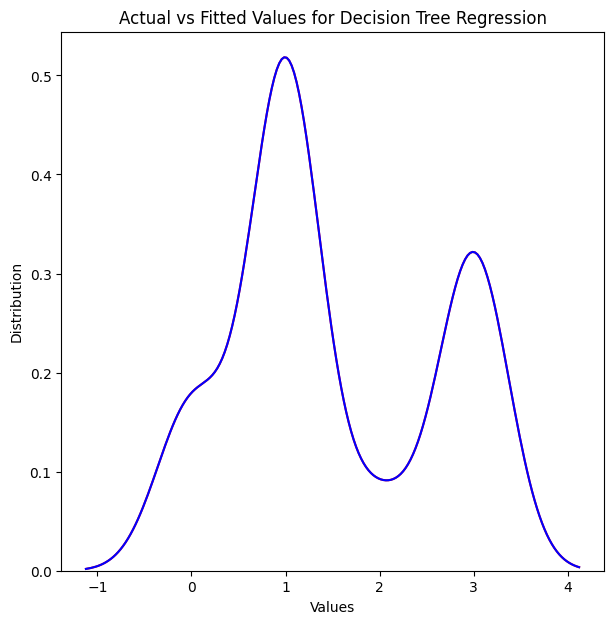

' ACTUAL VS PREDICTED VALUES THROUGH GRAPHICAL REPRESENTATION.\n    RED  - ACTUAL VALUES\n    BLUE - PREDICTED VALUES '

In [18]:
plt.figure(figsize=(7,7))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Decision Tree Regression')
plt.xlabel('Values')
plt.ylabel('Distribution')
plt.show()

''' ACTUAL VS PREDICTED VALUES THROUGH GRAPHICAL REPRESENTATION.
    RED  - ACTUAL VALUES
    BLUE - PREDICTED VALUES '''

In [19]:
print('MAE:', mean_absolute_error(y_test, dtree_pred))
print('MSE:', mean_squared_error(y_test, dtree_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtree_pred)))
print('Accuracy:', dtree.score(x_test,y_test))

MAE: 0.0
MSE: 0.0
RMSE: 0.0
Accuracy: 1.0


C:\AshishPython\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\AshishPython\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\AshishPython\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\AshishPython\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\AshishPython\Lib\

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

mth = int(input("Enter maths marks out of 100: "))
eng = int(input("Enter english marks out of 200: "))

user_input = pd.DataFrame({
    'gender': [1],
    'race/ethnicity': [2],
    'parental level of education' : [4],
    'lunch': [1],
    'test preparation course': [1],
    'math score': [mth],
    'english score': [eng]
})

recc = int(dtree.predict(user_input))
result = recomm.get(recc)
print(f'Reccomendation is: {result}')

Enter maths marks out of 100:  45
Enter english marks out of 200:  157


Reccomendation is: Algebra


C:\AshishPython\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\AshishPython\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\AshishPython\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
